# Image compression using K-means clustering 
I will use the K-means clustering algorithm to compress an image in this project. 

* I will give you some background on how K-means clustering works and then work you through how it can be used to compress an image.
* I won't be using any library like Scikit-learn to implement K-means as it creates a "black box" and makes it much harder to explain what the algorithm is doing.

# Outline
- [1- Background](#1)
  - [1.1 - K-means clustering and how it works](#1.1)
  - [1.2 - Formal explanation of K-means](#1.2)
  - [1.3 - Image_compression](#1.3)
- [2- Implementation](#2)
  - [2.1 - Editing the notebook](#2.1)
- [3- Refrences](#3)
         


<a name ="1"></a>
## 1 - Background


<a name = "1.1"></a>
### 1.1 - K-means clustering and how it works

K-means clustering is an unsupervised learning algorithm used to find relations between the features of data points of a given dataset and group them. What we mean by the algorithm being an unsupervised learning algorithm is that it is given feature $x$  but no target $y$. 
Some popular applications of K-means clustering are grouping related newspaper articles, grouping related search results as seen in Google, etc. 


Before we explain how K-means works let us first define some terminology:
  * Cluster – This is a group of related data points 
  * Centroids – this is the center of a cluster which is calculated as the average of all the data points in that cluster


The general idea of the K-means clustering algorithm can be summarized in two steps:
  * Assign points to cluster centroids 
  * Move cluster centroids


Let's go into more detail about what this means:
  * We first randomly initialize cluster centroids.	 We do this by randomly picking data points from our data set and making them the center of our clusters. Note that the number of clusters you want to form from the given dataset will be equal to the number of centroids you will initialize 
  * After randomly picking centroids, you assign each data point to the closest centroid. This can also be seen as associating the data points to the center. 
  * Then recompute each centroid by taking the average of its associated data points and moving the centroid to the calculated value.
  * Repeat steps 2 and 3 until convergence. Convergence occurs when further repetition of steps 2 and 3 does not, or changes insignificantly the location of the centroids or assignment of data points. 


<a name = "1.2"></a>
### 1.2 - Formal explanation of K-means


From a more technical perspective. K-means aims to optimize (reduce) the distortion cost function by changing the cluster to which the data points, $c^{(i)}$ are assigned and changing the cluster centroids, $ \mu_j$.

The Distortion Cost is represented as:
           $$J(c^{(i)},\mu_k) = \frac{1}{m} \sum_{i=1}^m\quad ||x^{(i)} - \mu_c^{(i)}||^2$$
where:
* $k$ is the number of clusters and therefore the number of centroids.
* $m$ is the number of training examples. 
* $c^{(i)}$ is the index of cluster $(1,2,....,k)$ to which example $x^{(i)}$ is currently assigned
* $x^{(i)}$ is the ith training example $(x^{(1)},x^{(2)},....,x^{(m)})$
* $\mu_k$ is the cluster centroid k
* $\mu_c^{(i)}$ is the cluster centroid of cluster to which $x^{(i)}$ has been assigned

Therefore the algorithm will be:

```
Randomly initialize k cluster centroids:
    #where k = number of clusters (scalar)
    #centroids = vectors with the same dimensions as your training example x(i)
    #i.e. having two features in your training set (x_1,x_2) will result in your
    #centroids being 2 dimensional
Repeat until convergence:
   #Assign points to cluster centroids
   for i = 1 to m:
       c_i = index (from 1 to k) of cluster centroids closest to x_i by finding
             min_k(x_i - centroid[k])^2
   # Move cluster centroids
   for k = 1 to k:
       centroid[k] =  average (mean) of points assigned to cluster k
     
````
Note that this is no different from the explanation I had given earlier for k-means 

<a name ="1.3" ></a>
### 1.3 - Image compression

#### About image compression 

Compression is defined as the process of reducing the size of data, in this case, an image, without degrading its quality below an acceptable threshold. This reduced size often leads to benefits such as less memory required to process and store the image; faster throughput when sending it over a network, etc.

compression techniques are classified into two types:
* **Lossy** - which reduces the size of the image by removing some of the original information but still to a point that the image is recognizable
* **Lossless** - which reduces the size of the image by removing some unnecessary metadata.

when K-means is applied to image compression. It is a Lossy compression.




#### How is K-means applied to image compression 

K-means is applied to compress an image by selecting $K$ number of colors to represent the entire image. This results in a reduction in the size of the image. This process is known as *Color Quantization*. 


K-means does this by finding the best possible $K$ colors to use to represent the given image.


#### How K-means provides compression

Each pixel in an image is represented by 3 colors or an RGB value, with each color ranging from 0 to 255. This means that each color is represented by 8 bits
(log2(256) = 8). This means that each pixel is 24 bits. if we apply k means to select 16 colors which we will use to represent the entire image we will only need 4 bits a pixel (log2(16) = 4). This means by applying K-means we have compressed the image by a factor of 6. 


<a name = "2"></a>
## 2 - Implementation 

First, run the cell below to import the packages needed:

- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- `utils.py` contains the implementation of all the functions used
- [PIL](https://pillow.readthedocs.io/en/stable/) is a Python library for handling images
- `os` is a Python module for operating system-dependent functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from utils import *
from PIL import Image
import os
# helps reload the changes I make to utils.py file 
%load_ext autoreload
%autoreload 2



size of original image is 546.391KB
shape of original image: (600, 400, 4)
shape of x_img:(240000, 4)
first element in x_img: [0.6        0.6862745  0.45882353 1.        ]


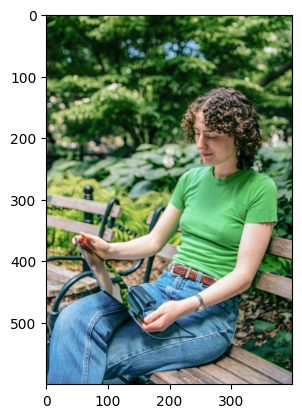

In [3]:
# load input image 
input_image ="input_img/human.png"
# Get file size 
file_name, file_extension = os.path.splitext(input_image)
image_size = os.path.getsize(input_image)
image_size= image_size/1024
print(f'size of original image is {image_size:.3f}KB')
#display image at output 
image = plt.imread(input_image)

# lets visualize the image and get the shape 
img_h,img_w,color_sys = image.shape
print(f'shape of original image: {image.shape}')
plt.imshow(image)

# preprocessing to enable us run K-means on the image
#for .jpg and .gif images 
#divide the original image by 255 so that all values are within the range 0-1 (not necessary for PNG files)
if file_extension == '.jpg' or file_extension == '.gif':
    image = image/255 
    
# reshape the image into an m x color_sys matrix where m is the number of pixels
#color_sys refers to the color system used to represent the image.This is 3 for RGB and 4 for RGBA 
# this is what we will use for K means and we will call it x_img 
x_img = np.reshape(image, (image.shape[0] * image.shape[1],color_sys))
#print the shape and first row of x_img 
print(f'shape of x_img:{x_img.shape}')
print(f'first element in x_img: {x_img[1, :]}')

In [4]:
# randomly initialize k cluster centroids 
k = 16
initial_centroids = init_centroids(k, x_img)
print(f'inital centroids\n{initial_centroids}')


inital centroids
[[0.33333334 0.67058825 0.39215687 1.        ]
 [0.01960784 0.15686275 0.06666667 1.        ]
 [0.10588235 0.30588236 0.05882353 1.        ]
 [0.30980393 0.47058824 0.18039216 1.        ]
 [0.56862748 0.42352942 0.35686275 1.        ]
 [0.3137255  0.50980395 0.66274512 1.        ]
 [0.21176471 0.23137255 0.16862746 1.        ]
 [0.36862746 0.3019608  0.29803923 1.        ]
 [0.04705882 0.15294118 0.03137255 1.        ]
 [0.02352941 0.14509805 0.03137255 1.        ]
 [0.89411765 0.90196079 0.90980393 1.        ]
 [0.63137257 0.72549021 0.42352942 1.        ]
 [0.02745098 0.14509805 0.03137255 1.        ]
 [0.36078432 0.75686276 0.42352942 1.        ]
 [0.30588236 0.42745098 0.2        1.        ]
 [0.48627451 0.59607846 0.41568628 1.        ]]


In [5]:
# when your image is a .gif 
# Running K-means above one iteration will lead to the entire image being represented as a single color 
# while max_iters = 20 give me consistently better compression for .jpg and .png
max_iters = 20
#running k-means 
idx, centroids,all_idx, all_centroids = run_kmeans(x_img, initial_centroids, max_iters)

K-means iteration 0/19
K-means iteration 1/19
K-means iteration 2/19
K-means iteration 3/19
K-means iteration 4/19
K-means iteration 5/19
K-means iteration 6/19
K-means iteration 7/19
K-means iteration 8/19
K-means iteration 9/19
K-means iteration 10/19
K-means iteration 11/19
K-means iteration 12/19
K-means iteration 13/19
K-means iteration 14/19
K-means iteration 15/19
K-means iteration 16/19
K-means iteration 17/19
K-means iteration 18/19
K-means iteration 19/19


In [6]:
# we will now print the shape of all_centroids and split it 
# this is because half of it is just zeros while half are the centroids at each iteration 
print(f'shape of all_centroids before spliting: {all_centroids.shape}')
zero, all_centroids_p = np.array_split(all_centroids,2,axis = 0)
print(f'shape of all centroids after spliting:{all_centroids_p.shape}')
# shape of all_idx
print(f'shape of all_idx{all_idx.shape}')

shape of all_centroids before spliting: (640, 4)
shape of all centroids after spliting:(320, 4)
shape of all_idx(240000, 20)


In [7]:
#This function will generarte an image for each iteration of K-means
# we will use this to create an animated gif of the compression processs
image_generator(all_centroids_p,all_idx,max_iters,image,input_image,"human_2")

original image saved
iteration 0/19
image 0 generated successfully
iteration 1/19
image 1 generated successfully
iteration 2/19
image 2 generated successfully
iteration 3/19
image 3 generated successfully
iteration 4/19
image 4 generated successfully
iteration 5/19
image 5 generated successfully
iteration 6/19
image 6 generated successfully
iteration 7/19
image 7 generated successfully
iteration 8/19
image 8 generated successfully
iteration 9/19
image 9 generated successfully
iteration 10/19
image 10 generated successfully
iteration 11/19
image 11 generated successfully
iteration 12/19
image 12 generated successfully
iteration 13/19
image 13 generated successfully
iteration 14/19
image 14 generated successfully
iteration 15/19
image 15 generated successfully
iteration 16/19
image 16 generated successfully
iteration 17/19
image 17 generated successfully
iteration 18/19
image 18 generated successfully
iteration 19/19
image 19 generated successfully


The most drastic and visible change to the centroids is during the first iteration of k-means. The changes to the centroids still occur but it is no longer significant enough to be visible in the color of the centroids. What happens is that the assignment of pixels to centroids becomes more and more refined as it tries to represent as much of the information (shape and form) in the original image as possible. This is why at a certain number of iterations the size of the image increases and then decreases, while the resolution of the image increases constantly until convergence. 

To see this you can go to the iteration folder in this directory to analyse the size and quality of the image at different iterations 

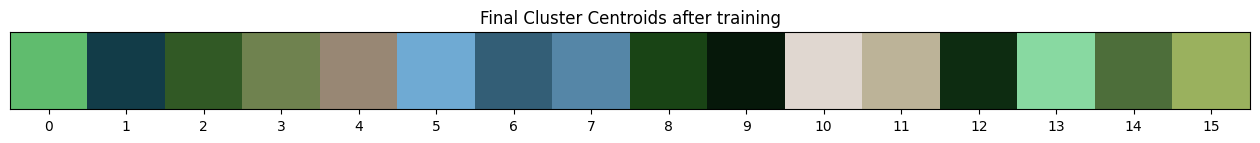

In [8]:
#display centroids after training 
display_cluster_centroids(centroids,'Final Cluster Centroids after training')

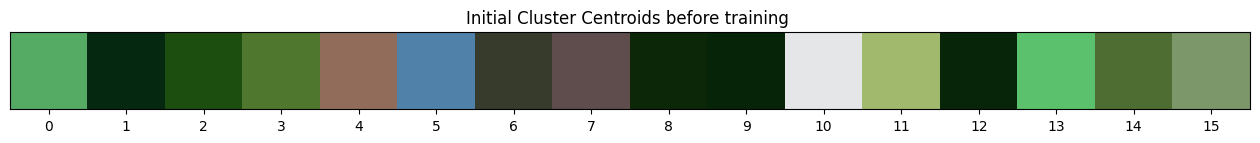

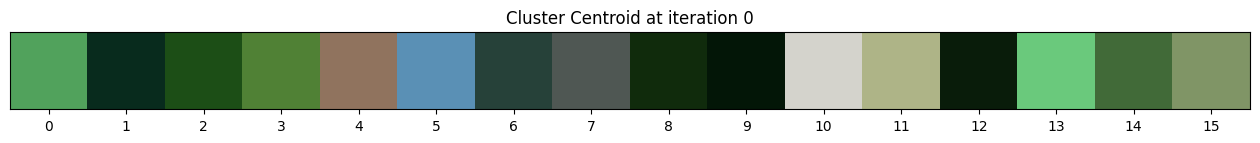

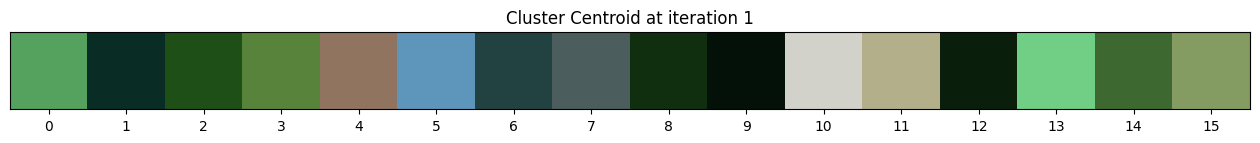

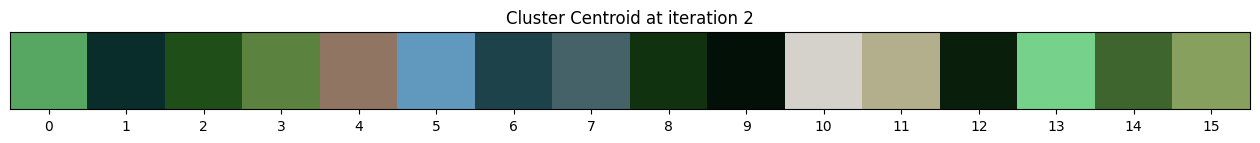

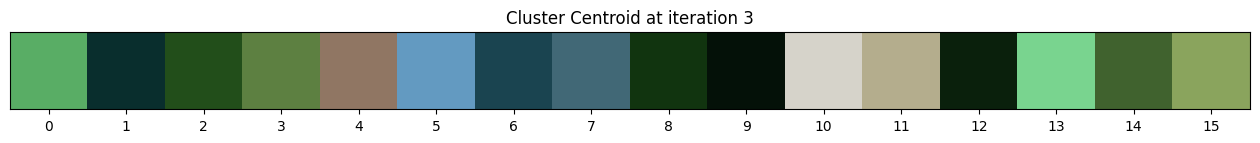

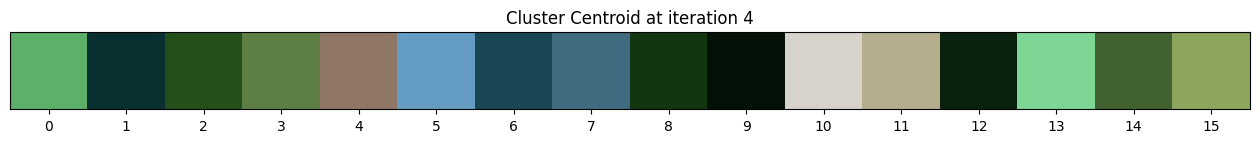

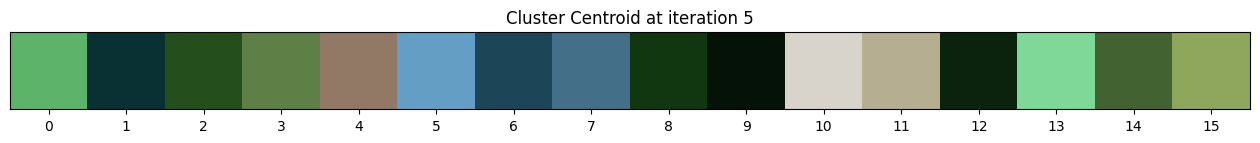

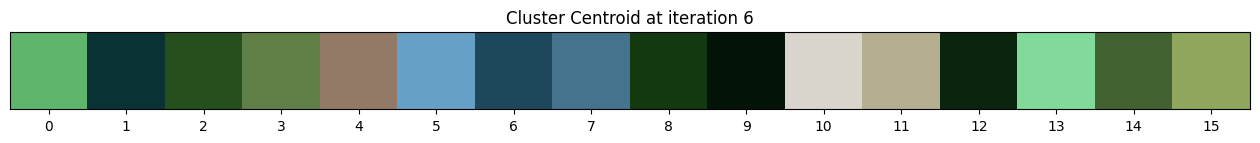

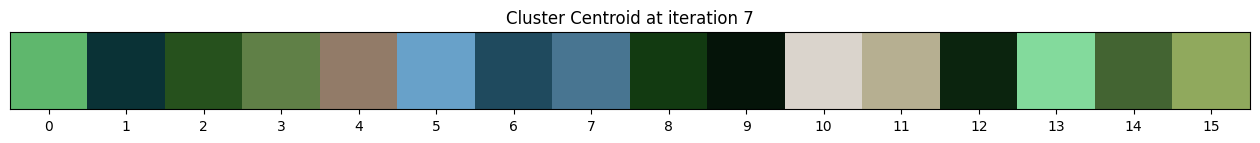

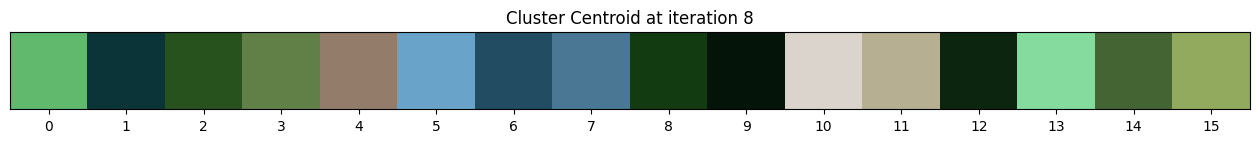

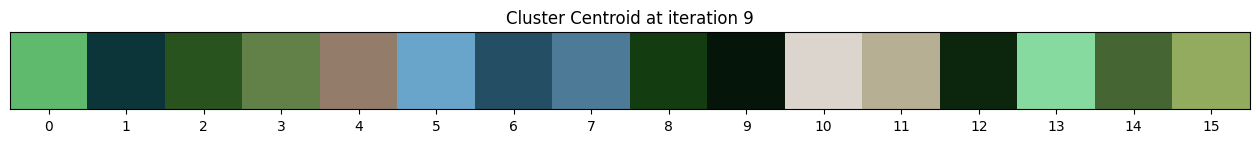

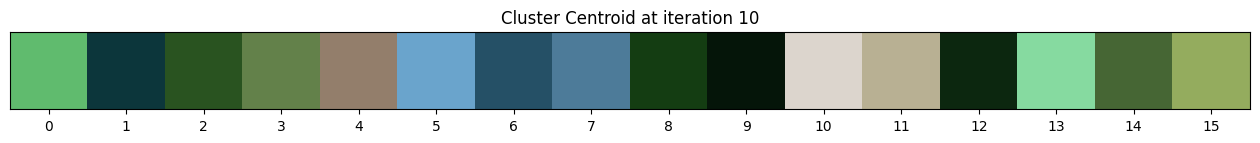

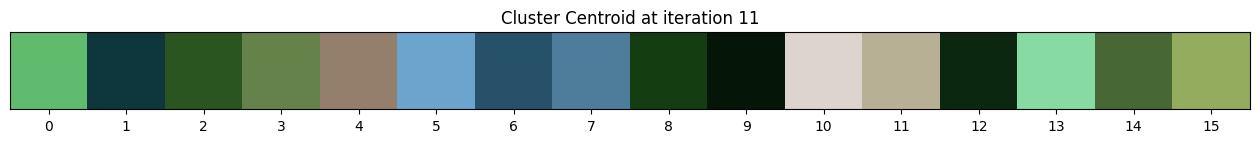

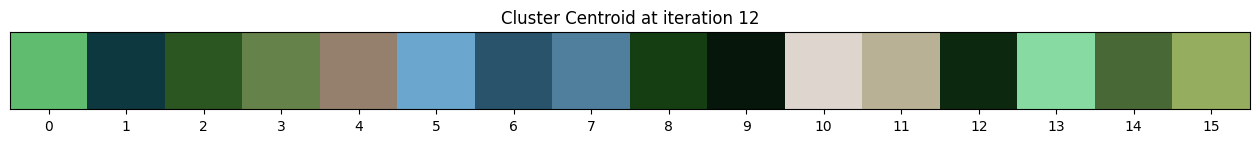

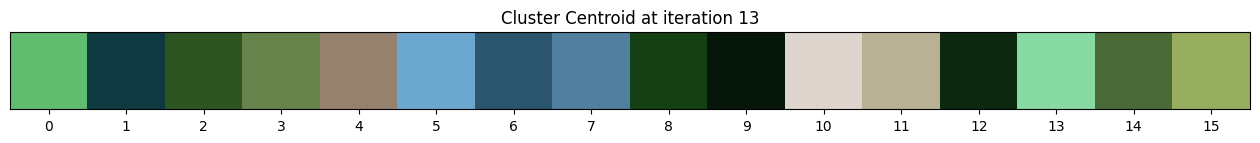

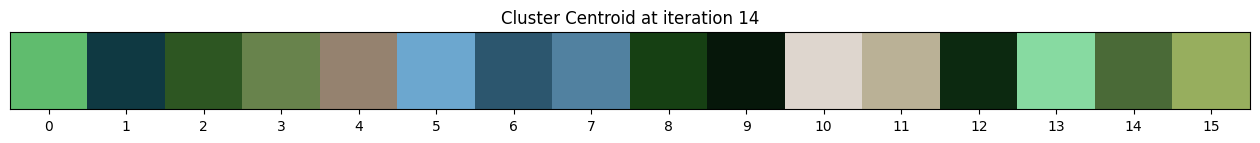

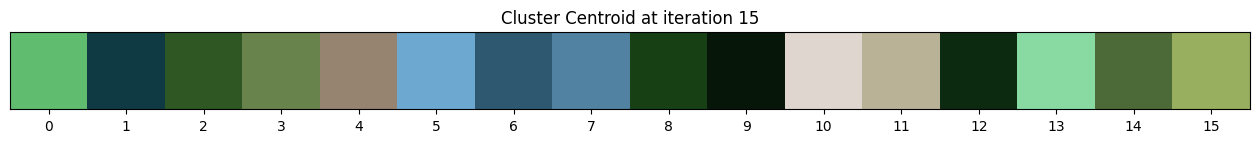

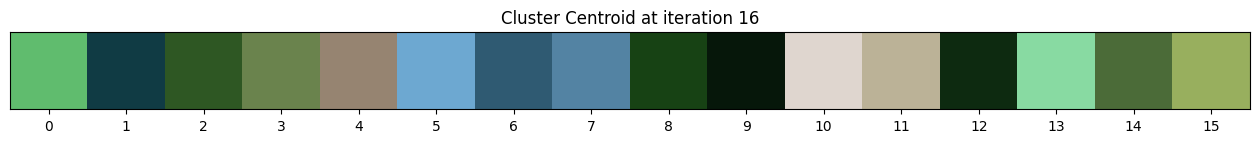

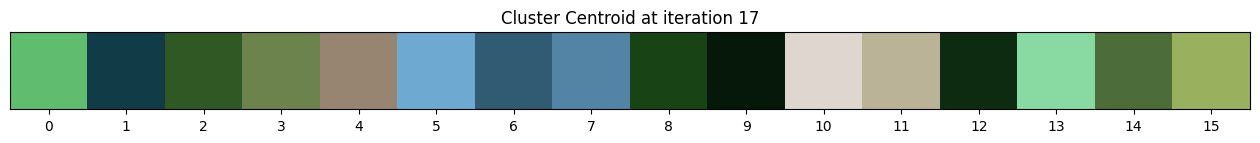

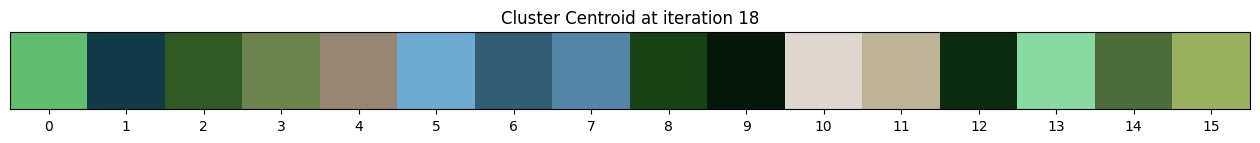

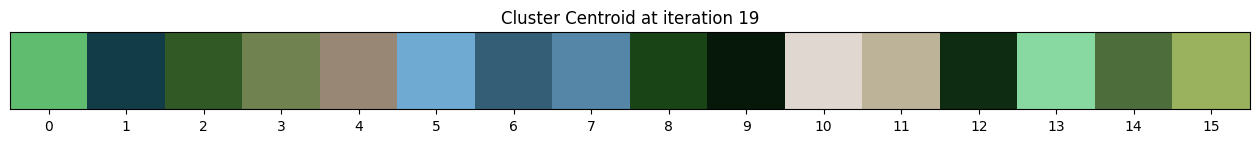

In [15]:
# display cluster centroids at each iteration
display_all_centroids(initial_centroids,all_centroids_p,max_iters) 
plt.savefig('centroids.png', dpi=300, bbox_inches='tight')

you will notice that the centroids' change at the first iteration of K-means is very pronounced compared to the subsequent iterations 

In [10]:
# compressing the image by assign each pixel to closest cluster centroid
x_compressed = centroids[idx,:]

#reshape to original image dimensions
x_compressed = np.reshape(x_compressed,image.shape)



In [11]:
#save the compressed 
save_file_name_as = "compressed_img/compressed_human_2.png"
img = Image.fromarray((x_compressed * 225).astype(np.uint8))
img.save(save_file_name_as)

#get size of compressed image
x_compressed_size = os.path.getsize(save_file_name_as)
x_compressed_size= x_compressed_size/1024
print(f'Size of compressed image is {x_compressed_size:.3f}KB')



Size of compressed image is 108.053KB


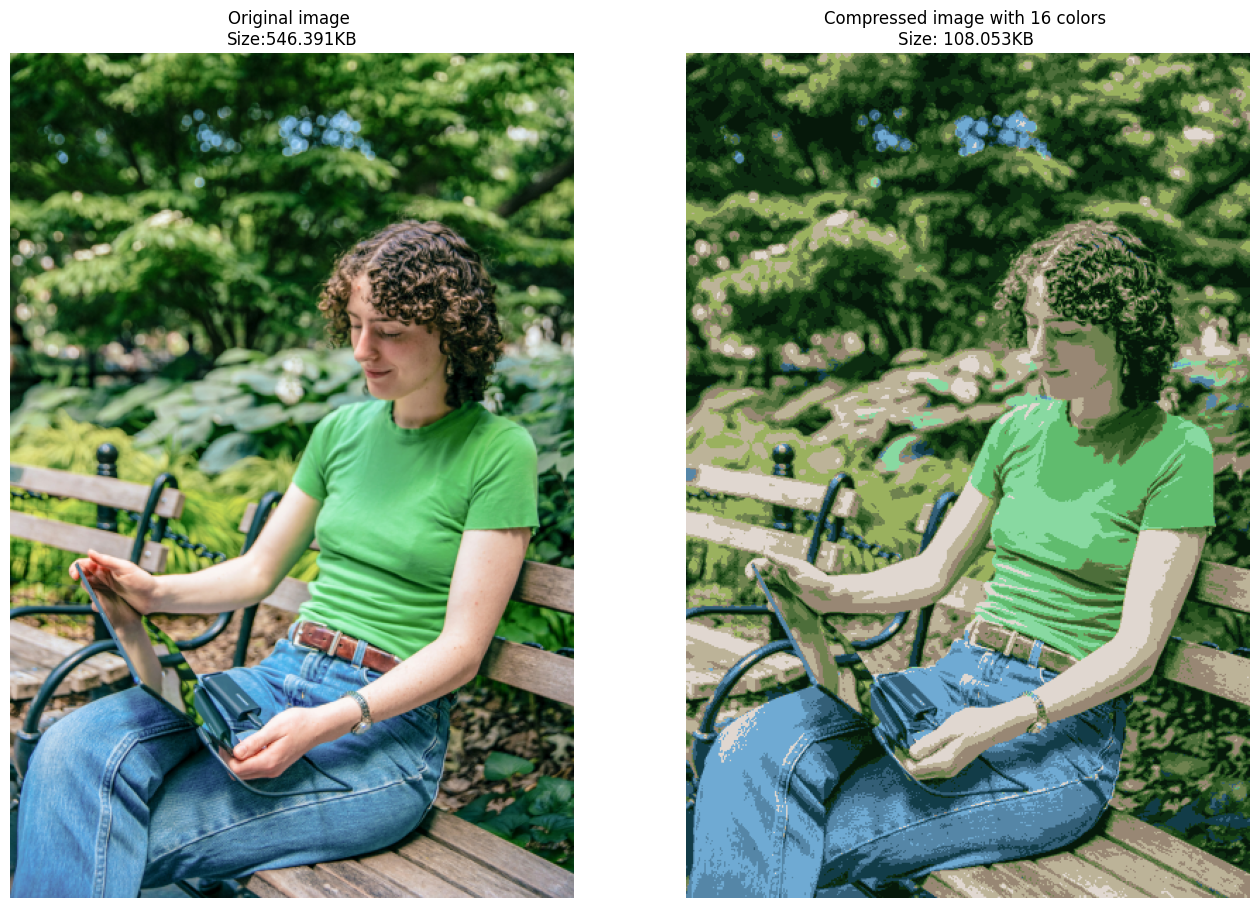

In [12]:
# display original image and compressed image side by side 
fig, ax = plt.subplots(1,2, figsize = (16,16))
plt.axis('off')

ax[0].imshow(image)
ax[0].set_title(f'Original image \nSize:{image_size:.3f}KB')
ax[0].set_axis_off()

ax[1].imshow(x_compressed)
ax[1].set_title(f'Compressed image with {k} colors \nSize: {x_compressed_size:.3f}KB ')
ax[1].set_axis_off()

# save the figure
plt.savefig('comparison.png', dpi=300, bbox_inches='tight')

In [13]:
# change image format under sorting in implementation of make_gif before running
save = 'gifs/human_2.gif'
make_gif("iterations/human_2",save)

['iterations/human_2\\image_before_compression.png', 'iterations/human_2\\image_iteration_0.png', 'iterations/human_2\\image_iteration_1.png', 'iterations/human_2\\image_iteration_10.png', 'iterations/human_2\\image_iteration_11.png', 'iterations/human_2\\image_iteration_12.png', 'iterations/human_2\\image_iteration_13.png', 'iterations/human_2\\image_iteration_14.png', 'iterations/human_2\\image_iteration_15.png', 'iterations/human_2\\image_iteration_16.png', 'iterations/human_2\\image_iteration_17.png', 'iterations/human_2\\image_iteration_18.png', 'iterations/human_2\\image_iteration_19.png', 'iterations/human_2\\image_iteration_2.png', 'iterations/human_2\\image_iteration_3.png', 'iterations/human_2\\image_iteration_4.png', 'iterations/human_2\\image_iteration_5.png', 'iterations/human_2\\image_iteration_6.png', 'iterations/human_2\\image_iteration_7.png', 'iterations/human_2\\image_iteration_8.png', 'iterations/human_2\\image_iteration_9.png']


# The Compression process at each iteration 

<div>
<img src='gifs/human_2.gif'/>
</div>

<a name = '2.1'></a>
### 2.1 - Editing the notebook

Feel free to edit any part of this implementation. You can find the implementation for all the custom functions used in the `utils.py` file.

If you will like to run the algorithm with your image here is what you do:
*  Save your image in the input_img folder located in the main folder for this project
*  Let `input_img = "path to your image"`. Run the cell to see if it is displayed at the output
*  Set your desired value for `k`, which is the number of colors your image will be reduced to
*  Create a folder inside the iterations folder. This is where your generated images will be stored.
*  Change the string in the `image_generator` function to the name of the folder you just created
*  Check the `image generator` function to make sure the images are saved in the correct format 
*  Change the `save_file_name_as` variable to the name you would like to save the compressed image. Save the image in the compressed_img folder and   don't forget to put the same file extension as the original image
*  change the `save` variable to what you want to save it as. save in the gifs folder  
*  Change the path of your `make_gif` to the folder where your images at each iteration are
*  Change image format under sorting in implementation of `make_gif` if it is not the same as the original mange before running
*  To display the gif in your notebook, change the `src` of `<img>` to the path where your gif is stored

 The larger the image, the longer the algorithm will run so try as much as possible to keep it small if you are running this on your computer 

<a name = "3"></a>
## 3 - Reference
* Sebastian Charmot (January 16, 2023).["Clear, Visual Explanation of K-Means for Image Compression with GIFs"](https://towardsdatascience.com/clear-and-visual-explanation-of-the-k-means-algorithm-applied-to-image-compression-b7fdc547e410).

